In [44]:
# Importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Reading Train Dataset and the Test Dataset.
train = pd.read_csv(r'C:\Users\sreeh\MLAI\Datasets\train_v9rqX0R.csv')
test = pd.read_csv(r'C:\Users\sreeh\MLAI\Datasets\test_AbJTz2l.csv')
pd.set_option('display.max_columns', None)

In [46]:
# Displaying the train dataset
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [47]:
# Checking the shape.
train.shape

(8523, 12)

In [48]:
# Displaying the test dataset
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [49]:
# Checking the shape
test.shape

(5681, 11)

In [50]:
# Creating a dataframe for the final submission.
submission = pd.DataFrame(test[['Item_Identifier','Outlet_Identifier']])

In [51]:
# Checking for missing values.
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [52]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [53]:
# Displaying the five number summary
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [54]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


Here we can see that the minimum value of Item_Visibility is 0 in both Train and Test. We will treat the zeroes as missing values.

In [55]:
# Converting 0 values to NaN.
train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.NaN)
test['Item_Visibility'] = test['Item_Visibility'].replace(0,np.NaN)

In [56]:
# Check the values in Item Fat Content
train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [57]:
test['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64

In [58]:
# Replacing LF and low fat with Low Fat
train['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat'}, inplace=True)
test['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat'}, inplace=True)

In [59]:
# Similarly change reg with Regular
train['Item_Fat_Content'].replace({'reg': 'Regular'}, inplace=True)
test['Item_Fat_Content'].replace({'reg': 'Regular'}, inplace=True)

In [60]:
# Calculate the mode of Outlet Size with respect to Outlet type
outlet_size_mode = train.groupby('Outlet_Type')['Outlet_Size'].agg(pd.Series.mode)

# Fill the null values in the 'Outlet_Size' column with the values from the outlet_size_mode Series
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Type'].map(outlet_size_mode))

In [61]:
# Similarly for test dataset
outlet_size_mode = test.groupby('Outlet_Type')['Outlet_Size'].agg(pd.Series.mode)
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Type'].map(outlet_size_mode))

In [62]:
# Fill the missing values using KNN.
missing_cols = ['Item_Weight','Item_Visibility']
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=8)
data_missing = train[missing_cols]
imputed_data = impute_knn.fit_transform(data_missing)
train = pd.concat([train.drop(missing_cols, axis=1), pd.DataFrame(imputed_data, columns=missing_cols)], axis=1)

In [63]:
missing_cols = ['Item_Weight','Item_Visibility']
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=7)
data_missing = test[missing_cols]
imputed_data = impute_knn.fit_transform(data_missing)
test = pd.concat([test.drop(missing_cols, axis=1), pd.DataFrame(imputed_data, columns=missing_cols)], axis=1)

### EDA

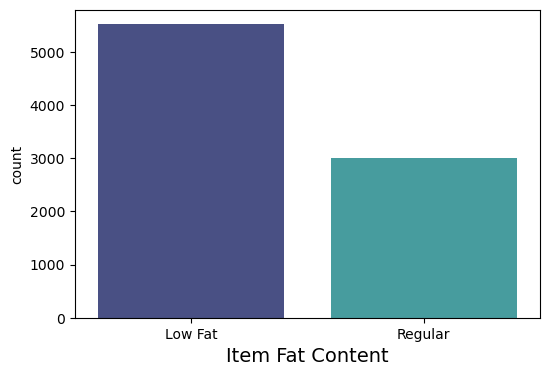

In [64]:
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=train ,palette='mako')
plt.xlabel('Item Fat Content', fontsize=14)
plt.show()

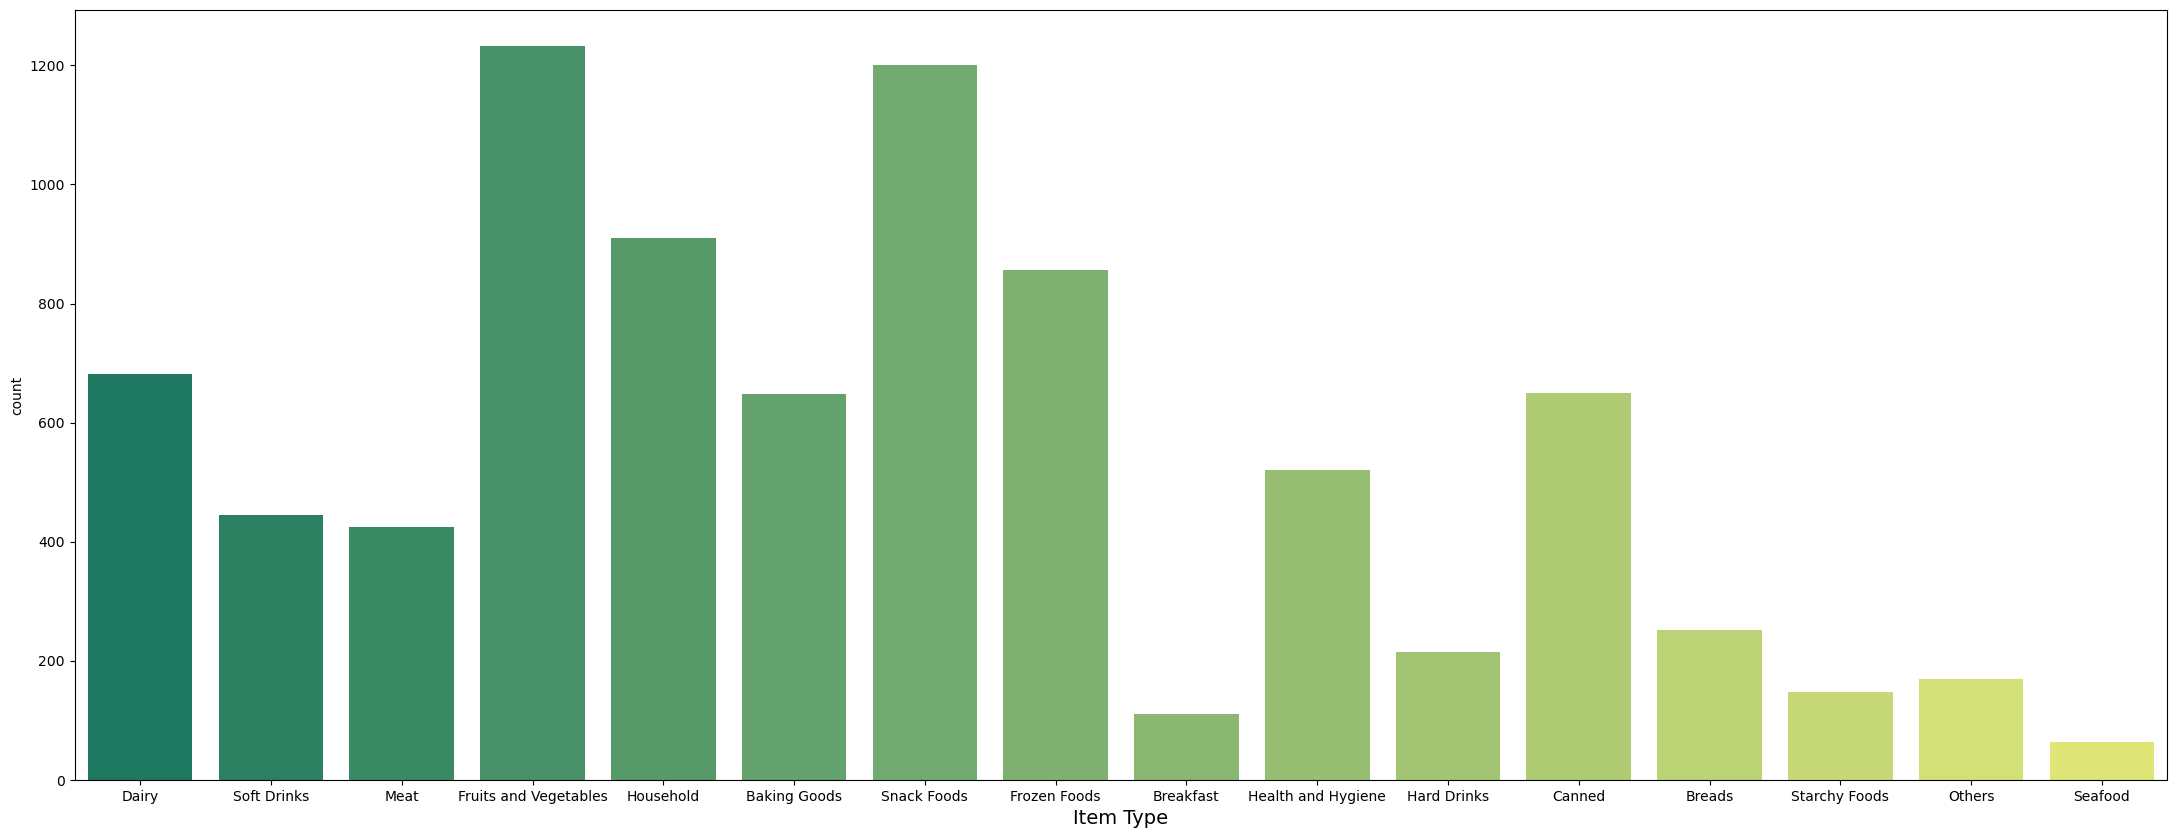

In [65]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=train ,palette='summer')
plt.xlabel('Item Type', fontsize=14)
plt.show()

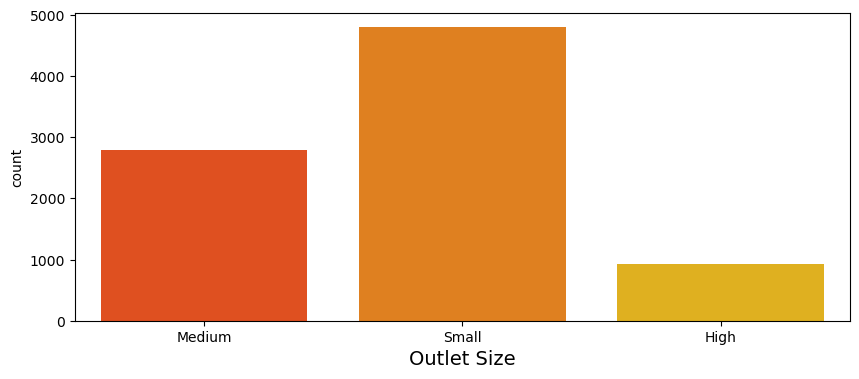

In [66]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size' , data=train ,palette='autumn')
plt.xlabel('Outlet Size', fontsize=14)
plt.show()

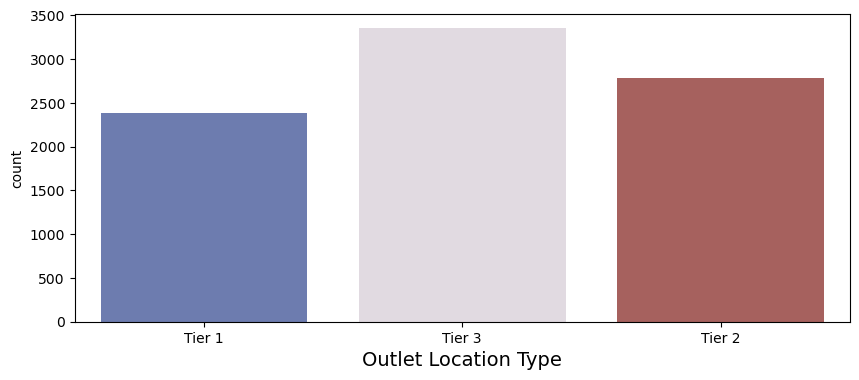

In [67]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type' , data=train ,palette='twilight_shifted')
plt.xlabel('Outlet Location Type', fontsize=14)
plt.show()

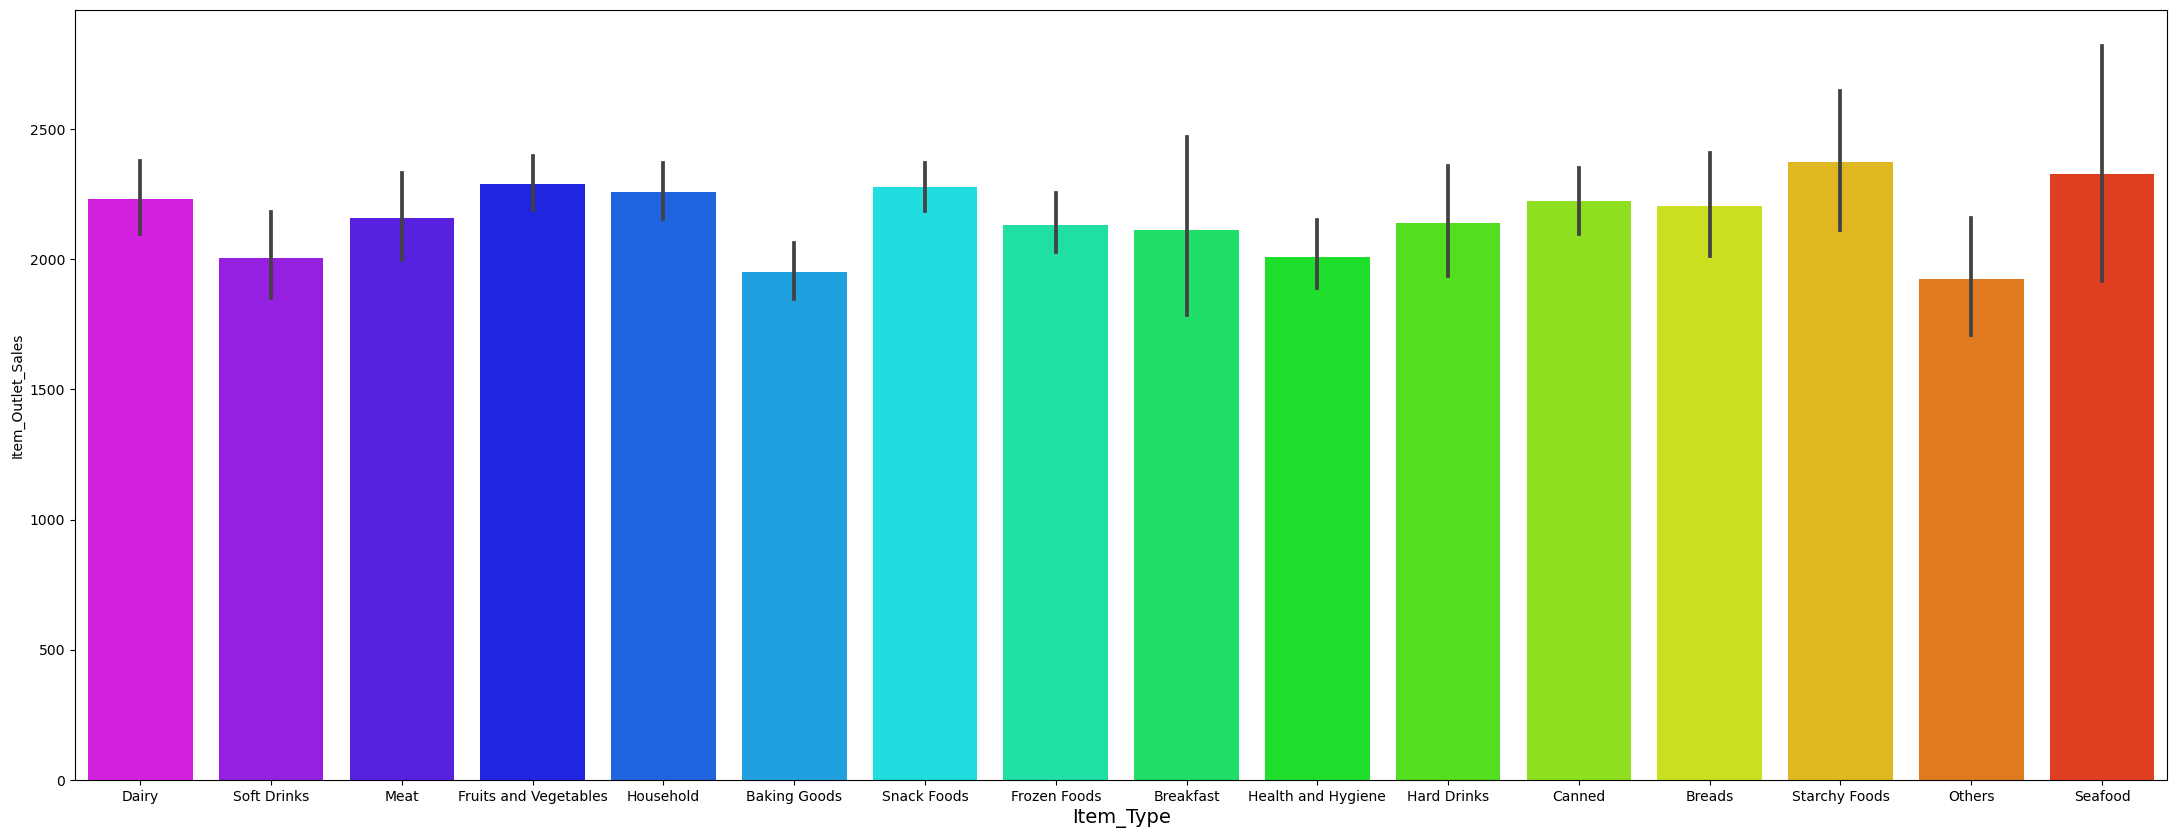

In [68]:
plt.figure(figsize=(27,10))
sns.barplot(x='Item_Type' ,y='Item_Outlet_Sales', data=train ,palette='gist_rainbow_r')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

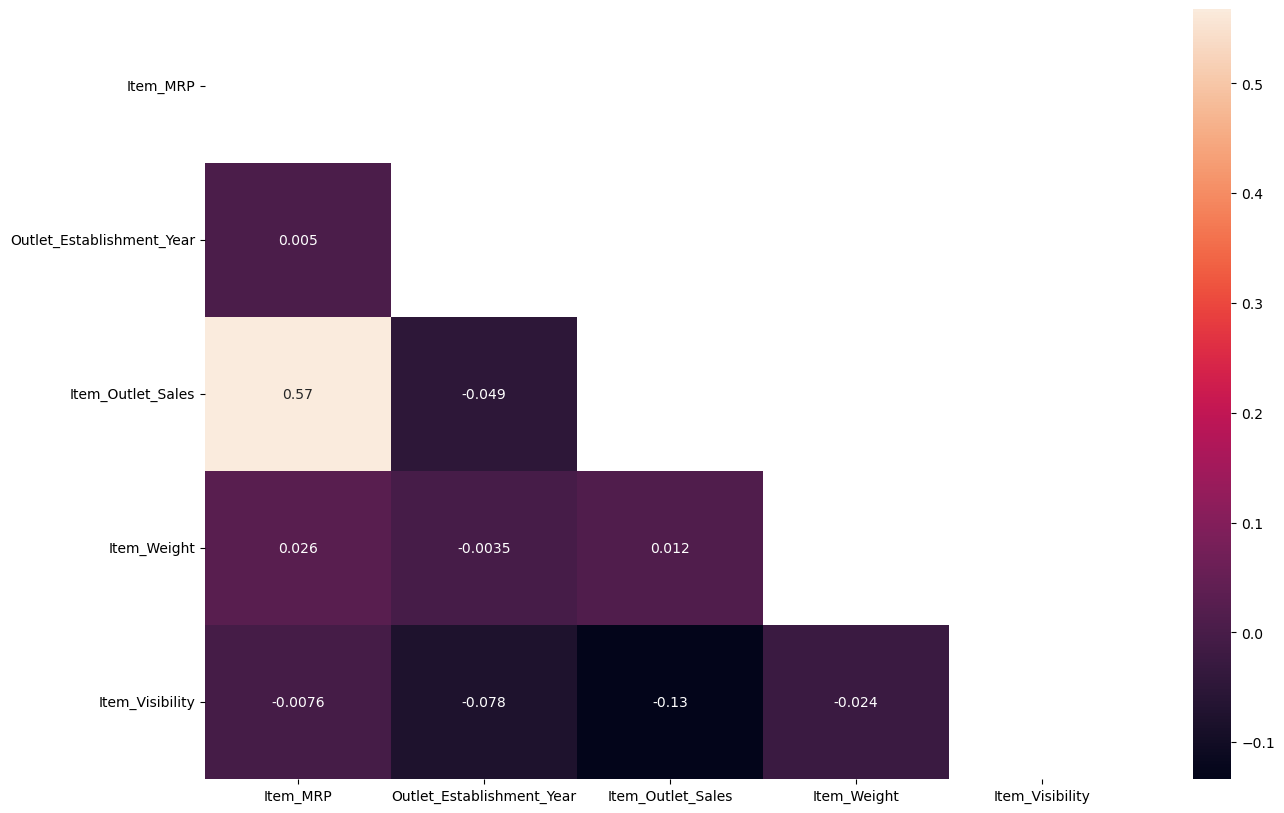

In [69]:
# Plotting a correlation matrix as a heatmap
plt.figure(figsize=(15, 10))
# Masking the top half
mask = np.triu(train.corr(numeric_only=True))
sns.heatmap(train.corr(numeric_only=True), annot=True, mask=mask)
plt.show()

In [70]:
# Creating item type combined by using the first two letters in item identifier values.
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[0:2])
train['Item_Type_Combined'] = train['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
train['Item_Type_Combined'].value_counts()

Item_Type_Combined
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [71]:
# Similarly for test
test['Item_Type_Combined'] = test['Item_Identifier'].apply(lambda x: x[0:2])
test['Item_Type_Combined'] = test['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
test['Item_Type_Combined'].value_counts()

Item_Type_Combined
Food              4076
Non-Consumable    1087
Drinks             518
Name: count, dtype: int64

In [72]:
# Since we have data only till 2013 using that to find the age of outlets.
train['Outlet_Years'] = 2013 - train['Outlet_Establishment_Year']
test['Outlet_Years'] = 2013 - test['Outlet_Establishment_Year']

In [73]:
# With the help of Item type combined we add non-consumable to item fat content
train.loc[train['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

In [74]:
# Same with test
test.loc[test['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
test['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat       2581
Regular       2013
Non-Edible    1087
Name: count, dtype: int64

In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet as a categorical feature
train['Outlet'] = le.fit_transform(train['Outlet_Identifier']).astype(object)

In [76]:
test['Outlet'] = le.fit_transform(test['Outlet_Identifier']).astype(object)

In [77]:
# Drop the redundant columns
train.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)
test.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

In [78]:
# Label encode the columns
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])

In [79]:
# Same for test dataset

In [80]:
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [81]:
# One hot encoding the outlet column
train_en = pd.get_dummies(train,columns=['Outlet'],dtype=int)
train_en.head()

,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight,Item_Visibility,Item_Type_Combined,Outlet_Years,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,0,249.8092,1,0,1,3735.1380,9.30,0.016047,1,14,0,0,0,0,0,0,0,0,0,1
1,2,48.2692,1,2,2,443.4228,5.92,0.019278,0,4,0,0,0,1,0,0,0,0,0,0
2,0,141.6180,1,0,1,2097.2700,17.50,0.016760,1,14,0,0,0,0,0,0,0,0,0,1
3,2,182.0950,2,2,0,732.3800,19.20,0.069918,1,15,1,0,0,0,0,0,0,0,0,0
4,1,53.8614,0,2,1,994.7052,8.93,0.023860,2,26,0,1,0,0,0,0,0,0,0,0


In [82]:
# One hot encoding the outlet column
test_en = pd.get_dummies(test,columns=['Outlet'],dtype=int)
test_en.head()

,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_Type_Combined,Outlet_Years,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,0,107.8622,1,0,1,20.750000,0.007565,1,14,0,0,0,0,0,0,0,0,0,1
1,2,87.3198,2,1,1,8.300000,0.038428,1,6,0,0,1,0,0,0,0,0,0,0
2,1,241.7538,2,2,0,14.600000,0.099575,2,15,1,0,0,0,0,0,0,0,0,0
3,0,155.0340,2,1,1,7.315000,0.015388,1,6,0,0,1,0,0,0,0,0,0,0
4,2,234.2300,1,2,3,16.640714,0.118599,1,28,0,0,0,0,0,1,0,0,0,0


In [83]:
# Splitting the data into Independent and Dependent columns
X=train_en.drop('Item_Outlet_Sales',axis=1)
y=train_en['Item_Outlet_Sales']

In [84]:
# Applying MinMaxScaler
cols = X.columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=cols)
X.head()

,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_Type_Combined,Outlet_Years,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,0.0,0.927507,0.5,0.0,0.333333,0.282525,0.038399,0.5,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.072068,0.5,1.0,0.666667,0.081274,0.048346,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.468288,0.5,0.0,0.333333,0.770765,0.040593,0.5,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.640093,1.0,1.0,0.000000,0.871986,0.204250,0.5,0.458333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.5,0.095805,0.0,1.0,0.333333,0.260494,0.062450,1.0,0.916667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
# Same for the test dataset
cols = test_en.columns
scaler = MinMaxScaler()
test_en = scaler.fit_transform(test_en)
test_en = pd.DataFrame(test_en,columns=cols)
test_en.head()

,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_Type_Combined,Outlet_Years,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,0.0,0.323413,0.5,0.0,0.333333,0.964275,0.012415,0.5,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.235849,1.0,0.5,0.333333,0.222983,0.108848,0.5,0.083333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.5,0.894140,1.0,1.0,0.000000,0.598095,0.299905,1.0,0.458333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.524488,1.0,0.5,0.333333,0.164335,0.036860,0.5,0.083333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.862069,0.5,1.0,1.000000,0.719602,0.359348,0.5,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [86]:
from sklearn.metrics import mean_squared_error
def rmse(actual, predict):
    # Compute the root mean squared error
    score = mean_squared_error(actual, predict, squared=False)
    return score

In [87]:
# creating rmse scorer for Nested Cross Validation
from sklearn.metrics import make_scorer
rmse_scorer = make_scorer(rmse, greater_is_better=False)

In [88]:
# Import the regressors and the grid search function
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the regressors and the hyperparameters to tune
regressors = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(),
    "Lasso Regression": Lasso(),
    "XGBoost Regression": XGBRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

param_grids = {
    "Linear Regression": {"fit_intercept": [True, False]},
    "Random Forest Regression": {"n_estimators": [10, 50, 100], "max_depth": [None, 3, 5]},
    "Lasso Regression": {"alpha": [0.1, 1, 10]},
    "XGBoost Regression": {"n_estimators": [10, 50, 100], "learning_rate": [0.01, 0.1, 0.5]},
    "Gradient Boosting Regression": {"n_estimators": [10, 50, 100], "learning_rate": [0.01, 0.1, 0.5], "max_depth": [None, 3, 5]}
}

# Declare the inner and outer cross-validation strategies
from sklearn.model_selection import cross_val_score, KFold
inner_cv = KFold(n_splits=10, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=0)

# Loop over the regressors and perform nested cross-validation
for name, regressor in regressors.items():
    # Inner cross-validation for parameter search
    model = GridSearchCV(estimator=regressor, param_grid=param_grids[name], cv=inner_cv, n_jobs=2, scoring=rmse_scorer)
    # Outer cross-validation for model evaluation
    test_score = cross_val_score(model, X, y, cv=outer_cv, n_jobs=3)
    # Print the mean score and the standard deviation
    mean_score = abs(test_score.mean())
    print(f"The mean score using nested cross-validation for {name} is: {mean_score:.3f} ± {test_score.std():.3f}")


The mean score using nested cross-validation for Linear Regression is: 1128.724 ± 28.893
The mean score using nested cross-validation for Random Forest Regression is: 1084.573 ± 25.915
The mean score using nested cross-validation for Lasso Regression is: 1128.760 ± 29.182
The mean score using nested cross-validation for XGBoost Regression is: 1097.103 ± 23.968
The mean score using nested cross-validation for Gradient Boosting Regression is: 1079.603 ± 25.719


In [94]:
# Doing Hyperparameter tuning on the Gradient Boosing Regression as it had the best performance
import optuna

kf = KFold(n_splits=10, shuffle=True, random_state=0)

# Define the objective function
def objective(trial):
    # Suggest values for the hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 10, 100, step = 1)
    max_depth = trial.suggest_int("max_depth", 2, 32, log=True)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.5,step = 0.01)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2"])
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10,step = 1)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10, step =1)

    # Create and train the gradient boost regressor
    model = GradientBoostingRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        max_features=max_features,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=0
    )
    # Use cross-validation to evaluate the model
    cv_score = cross_val_score(model, X, y, cv=kf, scoring="neg_mean_squared_error")
    # Return the negative mean of the scores
    return -cv_score.mean()

In [95]:
# Create a study object
study = optuna.create_study()
# Optimize the objective function
study.optimize(objective, n_trials=500, n_jobs=3)

[I 2023-11-05 15:26:41,073] A new study created in memory with name: no-name-7d3ae053-5089-4e21-b47c-4d09008ae978
[I 2023-11-05 15:26:44,047] Trial 2 finished with value: 1186871.3769021272 and parameters: {'n_estimators': 83, 'max_depth': 2, 'learning_rate': 0.14, 'max_features': 'log2', 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 2 with value: 1186871.3769021272.
[I 2023-11-05 15:26:46,084] Trial 0 finished with value: 1253089.725454071 and parameters: {'n_estimators': 71, 'max_depth': 4, 'learning_rate': 0.45, 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 9}. Best is trial 2 with value: 1186871.3769021272.
[I 2023-11-05 15:26:48,637] Trial 4 finished with value: 1176346.8586742866 and parameters: {'n_estimators': 48, 'max_depth': 3, 'learning_rate': 0.28, 'max_features': 'sqrt', 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 4 with value: 1176346.8586742866.
[I 2023-11-05 15:26:49,269] Trial 1 finished with value: 1394454.165710

[I 2023-11-05 15:27:49,311] Trial 30 finished with value: 1177153.43653739 and parameters: {'n_estimators': 37, 'max_depth': 2, 'learning_rate': 0.31, 'max_features': 'sqrt', 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 16 with value: 1172235.1610748707.
[I 2023-11-05 15:27:51,064] Trial 32 finished with value: 1205176.8861310936 and parameters: {'n_estimators': 22, 'max_depth': 5, 'learning_rate': 0.14, 'max_features': 'sqrt', 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 16 with value: 1172235.1610748707.
[I 2023-11-05 15:27:52,104] Trial 31 finished with value: 1219316.8575999832 and parameters: {'n_estimators': 40, 'max_depth': 5, 'learning_rate': 0.31, 'max_features': 'sqrt', 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 16 with value: 1172235.1610748707.
[I 2023-11-05 15:27:52,208] Trial 33 finished with value: 1178651.5878273877 and parameters: {'n_estimators': 76, 'max_depth': 2, 'learning_rate': 0.24000000000000002, 'max_feature

[I 2023-11-05 15:28:54,723] Trial 59 finished with value: 1184306.4017242366 and parameters: {'n_estimators': 85, 'max_depth': 3, 'learning_rate': 0.26, 'max_features': 'sqrt', 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 44 with value: 1171993.7208108867.
[I 2023-11-05 15:28:55,099] Trial 61 finished with value: 1177067.356434436 and parameters: {'n_estimators': 56, 'max_depth': 2, 'learning_rate': 0.29000000000000004, 'max_features': 'sqrt', 'min_samples_split': 8, 'min_samples_leaf': 6}. Best is trial 44 with value: 1171993.7208108867.
[I 2023-11-05 15:28:55,914] Trial 62 finished with value: 1229087.114694807 and parameters: {'n_estimators': 54, 'max_depth': 2, 'learning_rate': 0.12, 'max_features': 'sqrt', 'min_samples_split': 10, 'min_samples_leaf': 7}. Best is trial 44 with value: 1171993.7208108867.
[I 2023-11-05 15:28:56,967] Trial 63 finished with value: 1175527.5364856464 and parameters: {'n_estimators': 55, 'max_depth': 2, 'learning_rate': 0.33, 'max_featur

[I 2023-11-05 15:29:54,500] Trial 91 finished with value: 1191319.560300047 and parameters: {'n_estimators': 62, 'max_depth': 2, 'learning_rate': 0.16, 'max_features': 'sqrt', 'min_samples_split': 10, 'min_samples_leaf': 6}. Best is trial 44 with value: 1171993.7208108867.
[I 2023-11-05 15:29:55,488] Trial 92 finished with value: 1177931.772452642 and parameters: {'n_estimators': 62, 'max_depth': 2, 'learning_rate': 0.27, 'max_features': 'sqrt', 'min_samples_split': 9, 'min_samples_leaf': 6}. Best is trial 44 with value: 1171993.7208108867.
[I 2023-11-05 15:29:57,611] Trial 93 finished with value: 1181844.4543442547 and parameters: {'n_estimators': 56, 'max_depth': 3, 'learning_rate': 0.24000000000000002, 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 44 with value: 1171993.7208108867.
[I 2023-11-05 15:29:58,656] Trial 94 finished with value: 1176635.8432461803 and parameters: {'n_estimators': 56, 'max_depth': 3, 'learning_rate': 0.13, 'max_featur

[I 2023-11-05 15:31:28,696] Trial 120 finished with value: 1172418.1931101622 and parameters: {'n_estimators': 60, 'max_depth': 4, 'learning_rate': 0.12, 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 44 with value: 1171993.7208108867.
[I 2023-11-05 15:31:28,851] Trial 121 finished with value: 1178781.6243578182 and parameters: {'n_estimators': 60, 'max_depth': 4, 'learning_rate': 0.09, 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 44 with value: 1171993.7208108867.
[I 2023-11-05 15:31:32,368] Trial 122 finished with value: 1180146.9894944276 and parameters: {'n_estimators': 64, 'max_depth': 5, 'learning_rate': 0.09999999999999999, 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 44 with value: 1171993.7208108867.
[I 2023-11-05 15:31:34,451] Trial 123 finished with value: 1180146.9894944276 and parameters: {'n_estimators': 64, 'max_depth': 5, 'learning_rate': 0.0999999999

[I 2023-11-05 15:32:12,876] Trial 150 finished with value: 1172626.6115217796 and parameters: {'n_estimators': 66, 'max_depth': 3, 'learning_rate': 0.17, 'max_features': 'sqrt', 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 139 with value: 1171775.5085387863.
[I 2023-11-05 15:32:13,656] Trial 151 finished with value: 1172626.6115217796 and parameters: {'n_estimators': 66, 'max_depth': 3, 'learning_rate': 0.17, 'max_features': 'sqrt', 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 139 with value: 1171775.5085387863.
[I 2023-11-05 15:32:14,993] Trial 152 finished with value: 1173462.5341721354 and parameters: {'n_estimators': 66, 'max_depth': 3, 'learning_rate': 0.18000000000000002, 'max_features': 'sqrt', 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 139 with value: 1171775.5085387863.
[I 2023-11-05 15:32:16,401] Trial 153 finished with value: 1172626.6115217796 and parameters: {'n_estimators': 66, 'max_depth': 3, 'learning_rate': 0.17, 'ma

[I 2023-11-05 15:32:58,987] Trial 181 finished with value: 1171808.566710451 and parameters: {'n_estimators': 73, 'max_depth': 3, 'learning_rate': 0.16, 'max_features': 'log2', 'min_samples_split': 5, 'min_samples_leaf': 6}. Best is trial 173 with value: 1171691.5992643018.
[I 2023-11-05 15:33:09,980] Trial 175 finished with value: 1509523.9690186253 and parameters: {'n_estimators': 73, 'max_depth': 31, 'learning_rate': 0.16, 'max_features': 'sqrt', 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 173 with value: 1171691.5992643018.
[I 2023-11-05 15:33:13,841] Trial 184 finished with value: 1174378.809818138 and parameters: {'n_estimators': 75, 'max_depth': 3, 'learning_rate': 0.15000000000000002, 'max_features': 'log2', 'min_samples_split': 5, 'min_samples_leaf': 6}. Best is trial 173 with value: 1171691.5992643018.
[I 2023-11-05 15:33:17,515] Trial 185 finished with value: 1173428.371716296 and parameters: {'n_estimators': 72, 'max_depth': 3, 'learning_rate': 0.180000000

[I 2023-11-05 15:34:41,460] Trial 212 finished with value: 1170846.9136064134 and parameters: {'n_estimators': 71, 'max_depth': 3, 'learning_rate': 0.14, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 204 with value: 1170447.020910535.
[I 2023-11-05 15:34:43,442] Trial 210 finished with value: 1417236.7630371829 and parameters: {'n_estimators': 64, 'max_depth': 16, 'learning_rate': 0.13, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 204 with value: 1170447.020910535.
[I 2023-11-05 15:34:44,211] Trial 208 finished with value: 1485888.3117024873 and parameters: {'n_estimators': 69, 'max_depth': 25, 'learning_rate': 0.13, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 204 with value: 1170447.020910535.
[I 2023-11-05 15:34:47,109] Trial 214 finished with value: 1171287.4567622587 and parameters: {'n_estimators': 69, 'max_depth': 3, 'learning_rate': 0.14, 'max_features': 'lo

[I 2023-11-05 15:35:50,950] Trial 241 finished with value: 1237401.8413133088 and parameters: {'n_estimators': 76, 'max_depth': 7, 'learning_rate': 0.13, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 236 with value: 1170176.7042567697.
[I 2023-11-05 15:35:54,872] Trial 243 finished with value: 1173782.013811016 and parameters: {'n_estimators': 79, 'max_depth': 3, 'learning_rate': 0.12, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 236 with value: 1170176.7042567697.
[I 2023-11-05 15:35:59,259] Trial 242 finished with value: 1269783.197429462 and parameters: {'n_estimators': 79, 'max_depth': 9, 'learning_rate': 0.09999999999999999, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 236 with value: 1170176.7042567697.
[I 2023-11-05 15:36:02,658] Trial 238 finished with value: 1511111.1399465902 and parameters: {'n_estimators': 78, 'max_depth': 32, 'learning_rate': 0.13, 'max

[I 2023-11-05 15:37:21,936] Trial 272 finished with value: 1170075.4414428165 and parameters: {'n_estimators': 75, 'max_depth': 3, 'learning_rate': 0.13, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 272 with value: 1170075.4414428165.
[I 2023-11-05 15:37:34,532] Trial 270 finished with value: 1388106.665240014 and parameters: {'n_estimators': 75, 'max_depth': 14, 'learning_rate': 0.12, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 272 with value: 1170075.4414428165.
[I 2023-11-05 15:37:38,694] Trial 274 finished with value: 1217053.3291139323 and parameters: {'n_estimators': 81, 'max_depth': 3, 'learning_rate': 0.45, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 272 with value: 1170075.4414428165.
[I 2023-11-05 15:37:39,733] Trial 273 finished with value: 1406976.5665701642 and parameters: {'n_estimators': 75, 'max_depth': 14, 'learning_rate': 0.13, 'max_features': '

[I 2023-11-05 15:39:34,585] Trial 299 finished with value: 1293593.0840905015 and parameters: {'n_estimators': 78, 'max_depth': 9, 'learning_rate': 0.12, 'max_features': 'log2', 'min_samples_split': 3, 'min_samples_leaf': 6}. Best is trial 272 with value: 1170075.4414428165.
[I 2023-11-05 15:39:35,012] Trial 300 finished with value: 1496760.4270443867 and parameters: {'n_estimators': 78, 'max_depth': 8, 'learning_rate': 0.42000000000000004, 'max_features': 'log2', 'min_samples_split': 3, 'min_samples_leaf': 6}. Best is trial 272 with value: 1170075.4414428165.
[I 2023-11-05 15:39:39,909] Trial 303 finished with value: 1172858.5871619221 and parameters: {'n_estimators': 75, 'max_depth': 4, 'learning_rate': 0.11, 'max_features': 'log2', 'min_samples_split': 3, 'min_samples_leaf': 6}. Best is trial 272 with value: 1170075.4414428165.
[I 2023-11-05 15:39:40,338] Trial 304 finished with value: 1173800.4667337514 and parameters: {'n_estimators': 75, 'max_depth': 4, 'learning_rate': 0.11, 'ma

[I 2023-11-05 15:40:56,255] Trial 327 finished with value: 1372927.8198354295 and parameters: {'n_estimators': 76, 'max_depth': 15, 'learning_rate': 0.09999999999999999, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 7}. Best is trial 322 with value: 1169590.3818247605.
[I 2023-11-05 15:40:57,924] Trial 331 finished with value: 1173506.8288740518 and parameters: {'n_estimators': 95, 'max_depth': 3, 'learning_rate': 0.09, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 7}. Best is trial 322 with value: 1169590.3818247605.
[I 2023-11-05 15:40:59,380] Trial 332 finished with value: 1172792.006778694 and parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.14, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 7}. Best is trial 322 with value: 1169590.3818247605.
[I 2023-11-05 15:41:01,360] Trial 333 finished with value: 1172556.611560183 and parameters: {'n_estimators': 98, 'max_depth': 3, 'learning_rate': 0.14, 'ma

[I 2023-11-05 15:42:27,601] Trial 361 finished with value: 1184430.275404339 and parameters: {'n_estimators': 75, 'max_depth': 4, 'learning_rate': 0.15000000000000002, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 322 with value: 1169590.3818247605.
[I 2023-11-05 15:42:30,670] Trial 356 finished with value: 1501441.167488632 and parameters: {'n_estimators': 91, 'max_depth': 25, 'learning_rate': 0.12, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 322 with value: 1169590.3818247605.
[I 2023-11-05 15:42:31,259] Trial 362 finished with value: 1175271.8328430862 and parameters: {'n_estimators': 74, 'max_depth': 4, 'learning_rate': 0.13, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 322 with value: 1169590.3818247605.
[I 2023-11-05 15:42:31,756] Trial 363 finished with value: 1170575.314798092 and parameters: {'n_estimators': 80, 'max_depth': 3, 'learning_rate': 0.13, 'max_

[I 2023-11-05 15:44:14,912] Trial 387 finished with value: 1437931.1601184781 and parameters: {'n_estimators': 97, 'max_depth': 15, 'learning_rate': 0.11, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 322 with value: 1169590.3818247605.
[I 2023-11-05 15:44:19,002] Trial 391 finished with value: 1171828.5039881417 and parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.09999999999999999, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 322 with value: 1169590.3818247605.
[I 2023-11-05 15:44:19,422] Trial 392 finished with value: 1172474.5849863447 and parameters: {'n_estimators': 97, 'max_depth': 3, 'learning_rate': 0.09999999999999999, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 322 with value: 1169590.3818247605.
[I 2023-11-05 15:44:20,531] Trial 393 finished with value: 1170345.5946049087 and parameters: {'n_estimators': 100, 'max_depth': 3, 'learnin

[I 2023-11-05 15:46:07,586] Trial 418 finished with value: 1462334.8808112936 and parameters: {'n_estimators': 76, 'max_depth': 18, 'learning_rate': 0.13, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 322 with value: 1169590.3818247605.
[I 2023-11-05 15:46:10,096] Trial 420 finished with value: 1424146.1678500627 and parameters: {'n_estimators': 85, 'max_depth': 14, 'learning_rate': 0.13, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 322 with value: 1169590.3818247605.
[I 2023-11-05 15:46:11,474] Trial 423 finished with value: 1170789.608731446 and parameters: {'n_estimators': 72, 'max_depth': 3, 'learning_rate': 0.13, 'max_features': 'log2', 'min_samples_split': 5, 'min_samples_leaf': 6}. Best is trial 322 with value: 1169590.3818247605.
[I 2023-11-05 15:46:16,528] Trial 425 finished with value: 1170688.4866437956 and parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.11, 'max_features': 

[I 2023-11-05 15:48:03,939] Trial 451 finished with value: 1173687.720743983 and parameters: {'n_estimators': 78, 'max_depth': 3, 'learning_rate': 0.12, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 322 with value: 1169590.3818247605.
[I 2023-11-05 15:48:09,278] Trial 448 finished with value: 1486571.0020343468 and parameters: {'n_estimators': 94, 'max_depth': 22, 'learning_rate': 0.09999999999999999, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 322 with value: 1169590.3818247605.
[I 2023-11-05 15:48:16,172] Trial 452 finished with value: 1348010.7516919842 and parameters: {'n_estimators': 76, 'max_depth': 12, 'learning_rate': 0.12, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 322 with value: 1169590.3818247605.
[I 2023-11-05 15:48:19,074] Trial 455 finished with value: 1183834.5584639828 and parameters: {'n_estimators': 81, 'max_depth': 2, 'learning_rate': 0.150000

[I 2023-11-05 15:49:44,183] Trial 476 finished with value: 1474803.18151944 and parameters: {'n_estimators': 67, 'max_depth': 20, 'learning_rate': 0.14, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 322 with value: 1169590.3818247605.
[I 2023-11-05 15:49:44,691] Trial 482 finished with value: 1171717.5467643144 and parameters: {'n_estimators': 72, 'max_depth': 3, 'learning_rate': 0.14, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 322 with value: 1169590.3818247605.
[I 2023-11-05 15:49:48,524] Trial 484 finished with value: 1174392.5844085594 and parameters: {'n_estimators': 76, 'max_depth': 3, 'learning_rate': 0.12, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 322 with value: 1169590.3818247605.
[I 2023-11-05 15:49:51,792] Trial 481 finished with value: 1437968.0542155758 and parameters: {'n_estimators': 70, 'max_depth': 14, 'learning_rate': 0.15000000000000002, 'ma

In [96]:
# Get the best parameters
best_params = study.best_params

In [97]:
# Build the Final Model
final_model = GradientBoostingRegressor(
                n_estimators = best_params["n_estimators"],
                max_depth = best_params["max_depth"],
                learning_rate = best_params["learning_rate"],
                max_features = best_params["max_features"],
                min_samples_split = best_params["min_samples_split"],
                min_samples_leaf = best_params["min_samples_leaf"],
                random_state = 0)                    

In [118]:
# Fit X and y
final_model.fit(X,y)

GradientBoostingRegressor(learning_rate=0.11, max_features='log2',
                          min_samples_leaf=7, min_samples_split=4,
                          n_estimators=98, random_state=0)

In [119]:
# Predict the values using the sanitized test dataset
test_pred = final_model.predict(test_en)

In [120]:
# Add a Column with the predicitons
submission['Item_Outlet_Sales'] = test_pred.round(4)

In [121]:
# Export it into a csv file
submission.to_csv('BigMarketSales1.csv',index = False)

The final RMSE value is shown in the figure below.

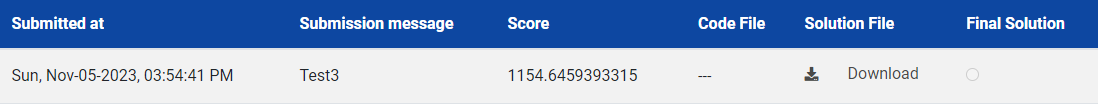